# Week 4 Intro

Inference is an inductive reasoning process that begins with some information about specific cases and leads to some conclusion that is more general. Statistical inference takes this same kind of logical thinking a step further by dealing systematically with situations where we have uncertain or incomplete information. Unlike deductive reasoning, conclusions that we draw inductively from samples of data are never fixed or firm. We model uncertainty as carefully as we can, but we can never be 100% sure of anything when we are using statistical inference. 

We have spent the last four weeks preparing to use the tools of statistical inference. Our considerations of probability two weeks ago gave us the tools to consider sampling distributions last week. Sampling distributions provide the method we need for building models of uncertainty. This week, we formalize our capability to use sampling distributions by creating confidence intervals. A confidence interval is a band of uncertainty around a statistical point estimate (e.g., a mean). Similar to the concepts from last week, a confidence interval is a statement about probabilities over the long run and not a about the specific data sample we have at hand. Any particular confidence interval we calculate may or may not contain the true population value: we will never know for sure.

# 4.2: Contrasting Deduction and Induction

Thinking is so important. I want to talk about two ways of doing it. They are deduction and induction. Some people refer to deductive thinking as top-down thinking. We start with some general principle and we work our way down to address specific cases.

So for example, we start with the principle that items that are shelved in the grocery store near the cash register are bought on impulse. And then we add to that the principle that impulse buys are generally for items that are costing less than 5 dollars. We can conclude then from those two principles that if we shelve some snack items costing less than 5 dollars near the register, then we'll get a lot of impulse buys of those snack items.

Now, you might wonder who came up with the general principle that items that were shelved at the cash register result in impulse buys. The answer in all likelihood is that someone did it inductively. Induction is bottom-up thinking, reasoning from a set of examples that are observed to some higher principle. So it's likely that some person that worked in a store noticed that, as people came up to the cash register, they just grabbed that candy off there and threw it onto their cart, even though they had not planned on buying that.

Now, it's possible, of course, that some people do plan on popping right over to the cash register, and they've got a list of the candy that they're going to get. And that would be the exception that goes with the inductive rule. And that shows you that induction is largely a probabilistic type of reasoning.

So, though, induction comes from the idea that the workers in the store induced this probabilistic rule by noticing what seemed true in most cases. And most of statistical inference is based on this idea of induction, of observing something that's a pattern, that may not be a perfect pattern, but it's enough of a pattern that we can draw some conclusions from it.

So this leads us to a very important rule that I want you to internalize and always keep in mind. And never make this mistake when you're writing about data. You cannot prove anything from samples of data or by using statistical inference. You cannot prove anything. It's so important to think about this idea. It's intimately tied up with the scientific method. It doesn't mean that there is no truth, but it does mean that we have to weigh our evidence carefully in order to know how sure we are about something and to realize that we can never be absolutely sure about something when we're working with statistical data.

Inferential statistics gives us the opportunity to be precise and systematic about certainty and uncertainty. But there will always be uncertainty when we're working with data. So in the rest of the course and beyond, make sure that when you phrase your results, when you're talking about an analysis that you have done, that you'd never say that you've proved something from the statistical analysis results that you're presenting.

# 4.3: Comparing Means of Two Independent Samples

In [11]:
head(data()$results)

Package,LibPath,Item,Title
datasets,/Users/emilioramos/opt/anaconda3/envs/ist772/lib/R/library,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
datasets,/Users/emilioramos/opt/anaconda3/envs/ist772/lib/R/library,BJsales,Sales Data with Leading Indicator
datasets,/Users/emilioramos/opt/anaconda3/envs/ist772/lib/R/library,BJsales.lead (BJsales),Sales Data with Leading Indicator
datasets,/Users/emilioramos/opt/anaconda3/envs/ist772/lib/R/library,BOD,Biochemical Oxygen Demand
datasets,/Users/emilioramos/opt/anaconda3/envs/ist772/lib/R/library,CO2,Carbon Dioxide Uptake in Grass Plants
datasets,/Users/emilioramos/opt/anaconda3/envs/ist772/lib/R/library,ChickWeight,Weight versus age of chicks on different diets


In [12]:
str(co2)

 Time-Series [1:468] from 1959 to 1998: 315 316 316 318 318 ...


In [13]:
?co2

co2 {datasets},R Documentation


In [17]:
# install.packages('psych')

also installing the dependencies ‘tmvnsim’, ‘mnormt’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [21]:
library(psych)
head(data(package='psych')$results)

Package,LibPath,Item,Title
psych,/Users/emilioramos/opt/anaconda3/envs/ist772/lib/R/library,Bechtoldt,Seven data sets showing a bifactor solution.
psych,/Users/emilioramos/opt/anaconda3/envs/ist772/lib/R/library,Bechtoldt.1,Seven data sets showing a bifactor solution.
psych,/Users/emilioramos/opt/anaconda3/envs/ist772/lib/R/library,Bechtoldt.2,Seven data sets showing a bifactor solution.
psych,/Users/emilioramos/opt/anaconda3/envs/ist772/lib/R/library,Chen (Schmid),12 variables created by Schmid and Leiman to show the Schmid-Leiman Transformation
psych,/Users/emilioramos/opt/anaconda3/envs/ist772/lib/R/library,Damian,Project Talent data set from Marion Spengler and Rodica Damian
psych,/Users/emilioramos/opt/anaconda3/envs/ist772/lib/R/library,Dwyer,8 cognitive variables used by Dwyer for an example.


In [25]:
data(Dwyer)
str(Dwyer)
?Dwyer
head(Dwyer)

 num [1:8, 1:8] 1 0.58 -0.28 0.01 0.36 0.38 0.61 0.15 0.58 1 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:8] "V1" "V2" "V3" "V4" ...
  ..$ : chr [1:8] "V1" "V2" "V3" "V4" ...


,V1,V2,V3,V4,V5,V6,V7,V8
V1,1.00,0.58,-0.28,0.01,0.36,0.38,0.61,0.15
V2,0.58,1.00,-0.28,0.10,0.52,0.44,0.78,0.10
V3,-0.28,-0.28,1.00,0.56,0.14,-0.56,-0.42,-0.70
V4,0.01,0.10,0.56,1.00,0.40,-0.34,-0.03,-0.65
V5,0.36,0.52,0.14,0.40,1.00,0.08,0.46,-0.30
V6,0.38,0.44,-0.56,-0.34,0.08,1.00,0.54,0.50


Dwyer {psych},R Documentation


## MTCars Dataset

In [26]:
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [31]:
?mtcars
str(mtcars)
summary(mtcars)
describe(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mpg,1,32,20.090625,6.0269481,19.200,19.6961538,5.4114900,10.400,33.900,23.500,0.6106550,-0.37276603,1.06542396
cyl,2,32,6.187500,1.7859216,6.000,6.2307692,2.9652000,4.000,8.000,4.000,-0.1746119,-1.76211977,0.31570933
disp,3,32,230.721875,123.9386938,196.300,222.5230769,140.4763500,71.100,472.000,400.900,0.3816570,-1.20721195,21.90947271
hp,4,32,146.687500,68.5628685,123.000,141.1923077,77.0952000,52.000,335.000,283.000,0.7260237,-0.13555112,12.12031731
drat,5,32,3.596563,0.5346787,3.695,3.5792308,0.7042350,2.760,4.930,2.170,0.2659039,-0.71470062,0.09451874
wt,6,32,3.217250,0.9784574,3.325,3.1526923,0.7672455,1.513,5.424,3.911,0.4231465,-0.02271075,0.17296847
qsec,7,32,17.848750,1.7869432,17.710,17.8276923,1.4158830,14.500,22.900,8.400,0.3690453,0.33511422,0.31588992
vs,8,32,0.437500,0.5040161,0.000,0.4230769,0.0000000,0.000,1.000,1.000,0.2402577,-2.00193762,0.08909831
am,9,32,0.406250,0.4989909,0.000,0.3846154,0.0000000,0.000,1.000,1.000,0.3640159,-1.92474143,0.08820997


mtcars                package:datasets                 R Documentation

_M_o_t_o_r _T_r_e_n_d _C_a_r _R_o_a_d _T_e_s_t_s

_D_e_s_c_r_i_p_t_i_o_n:

     The data was extracted from the 1974 _Motor Trend_ US magazine,
     and comprises fuel consumption and 10 aspects of automobile design
     and performance for 32 automobiles (1973-74 models).

_U_s_a_g_e:

     mtcars
     
_F_o_r_m_a_t:

     A data frame with 32 observations on 11 (numeric) variables.

       [, 1]  mpg   Miles/(US) gallon                        
       [, 2]  cyl   Number of cylinders                      
       [, 3]  disp  Displacement (cu.in.)                    
       [, 4]  hp    Gross horsepower                         
       [, 5]  drat  Rear axle ratio                          
       [, 6]  wt    Weight (1000 lbs)                        
       [, 7]  qsec  1/4 mile time                            
       [, 8]  vs    Engine (0 = V-shaped, 1 = straight)      
       [, 9]  am    Transmission (0 = automatic, 1 = manual) 
       [,10]  gear  Number of forward gears                  
       [,11]  carb  Number of carburetors                    
      
_N_o_t_e:

     Henderson and Velleman (1981) comment in a footnote to Table 1:
     ‘Hocking [original transcriber]'s noncrucial coding of the Mazda's
     rotary engine as a straight six-cylinder engine and the Porsche's
     flat engine as a V engine, as well as the inclusion of the diesel
     Mercedes 240D, have been retained to enable direct comparisons to
     be made with previous analyses.’

_S_o_u_r_c_e:

     Henderson and Velleman (1981), Building multiple regression models
     interactively.  _Biometrics_, *37*, 391-411.

_E_x_a_m_p_l_e_s:

     require(graphics)
     pairs(mtcars, main = "mtcars data", gap = 1/4)
     coplot(mpg ~ disp | as.factor(cyl), data = mtcars,
            panel = panel.smooth, rows = 1)
     ## possibly more meaningful, e.g., for summary() or bivariate plots:
     mtcars2 <- within(mtcars, {
        vs <- factor(vs, labels = c("V", "S"))
        am <- factor(am, labels = c("automatic", "manual"))
        cyl  <- ordered(cyl)
        gear <- ordered(gear)
        carb <- ordered(carb)
     })
     summary(mtcars2)

In [35]:
mean(mtcars$mpg[mtcars$am==0]) # Automatic Transmissions
sd(mtcars$mpg[mtcars$am==0])

[1] 17.14737

[1] 3.833966

In [36]:
mean(mtcars$mpg[mtcars$am==1]) # Manual Transmissions
sd(mtcars$mpg[mtcars$am==1])

[1] 24.39231

[1] 6.166504

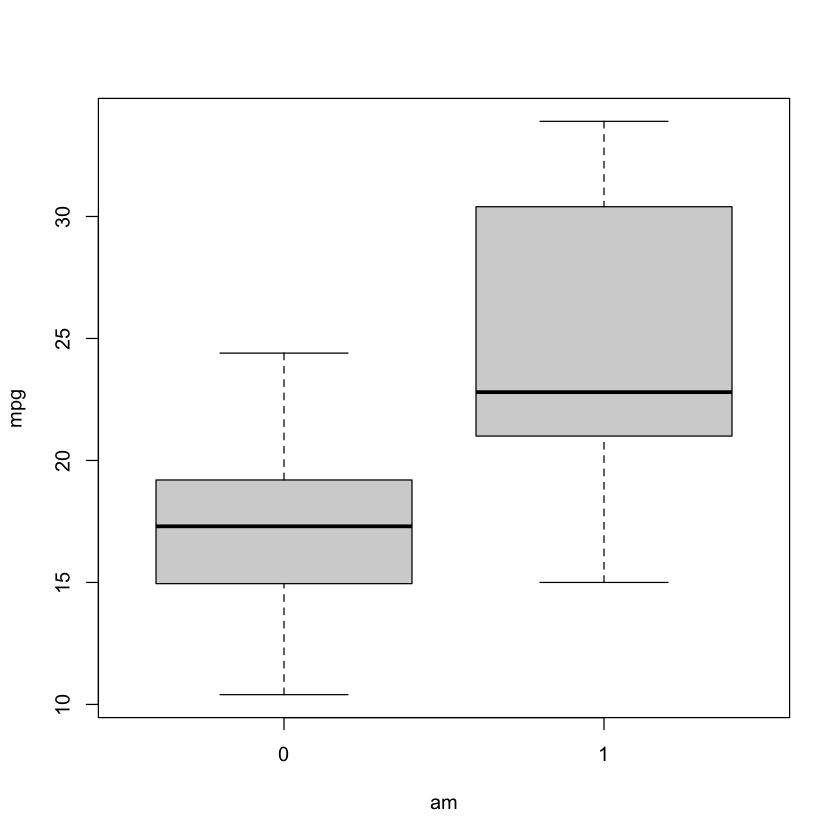

In [37]:
boxplot(mpg ~ am, data=mtcars) # Boxplot of mpg, group by am

# 4.4: A Simulation of Uncertainty: Repetitive Sampling to Simulate Distribution of Mean Differences

In [38]:
sample(mtcars$mpg[mtcars$am == 0], size=19, replace=TRUE)

[1] 19.2 19.2 21.5 10.4 15.5 21.4 19.2 22.8 18.7 15.2 19.2 14.3 15.2 10.4 14.3
[16] 15.5 16.4 14.3 21.5

In [39]:
sample(mtcars$mpg[mtcars$am == 1], size=13, replace=TRUE)

[1] 21.0 21.0 33.9 15.0 21.0 21.0 26.0 21.0 32.4 15.0 27.3 32.4 30.4

In [40]:
meanDiffs <- replicate(100, 
                      mean(sample(mtcars$mpg[mtcars$am == 0], size=19, replace=TRUE)) 
                     - mean(sample(mtcars$mpg[mtcars$am == 1], size=13, replace=TRUE)))

In [42]:
mean(mtcars$mpg[mtcars$am == 0])
mean(mtcars$mpg[mtcars$am == 1])

[1] 17.14737

[1] 24.39231

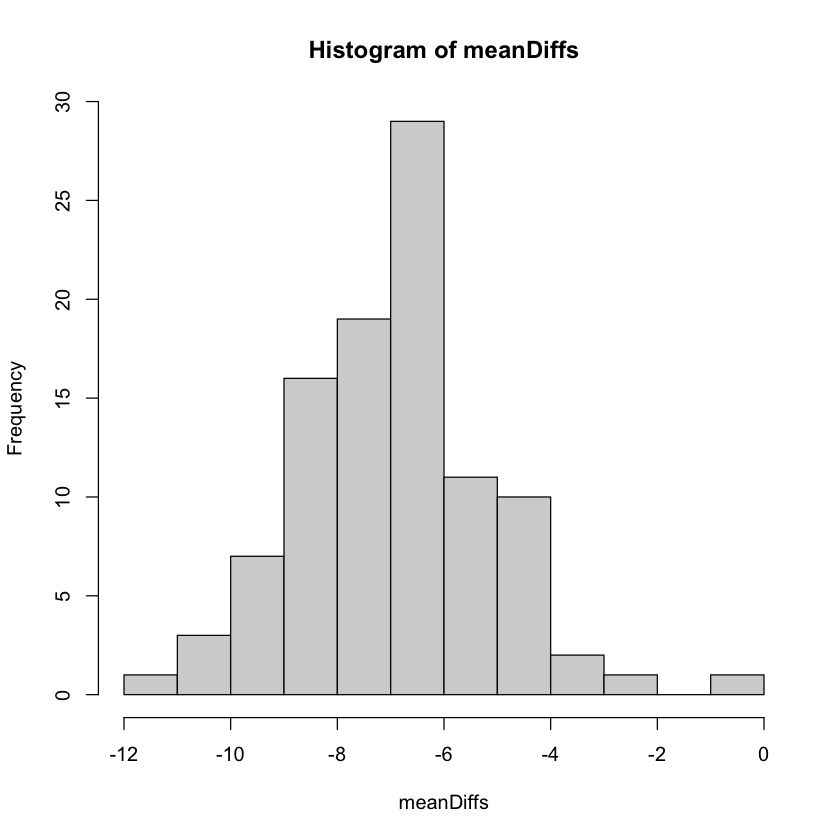

In [41]:
hist(meanDiffs)

In [57]:
length(mtcars$mpg[ mtcars$am == 0 ])

[1] 19

In [56]:
nrow(mtcars)

[1] 32

In [44]:
mean( sample(mtcars$mpg[ mtcars$am == 0 ],size=19,replace=TRUE))

[1] 16.85789

# 4.5: Our First Inferential Test

In [58]:
t.test(mtcars$mpg[ mtcars$am == 0 ], mtcars$mpg[ mtcars$am == 1])


	Welch Two Sample t-test

data:  mtcars$mpg[mtcars$am == 0] and mtcars$mpg[mtcars$am == 1]
t = -3.7671, df = 18.332, p-value = 0.001374
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -11.280194  -3.209684
sample estimates:
mean of x mean of y 
 17.14737  24.39231 


# 4.6: What is a Confidence Interval?

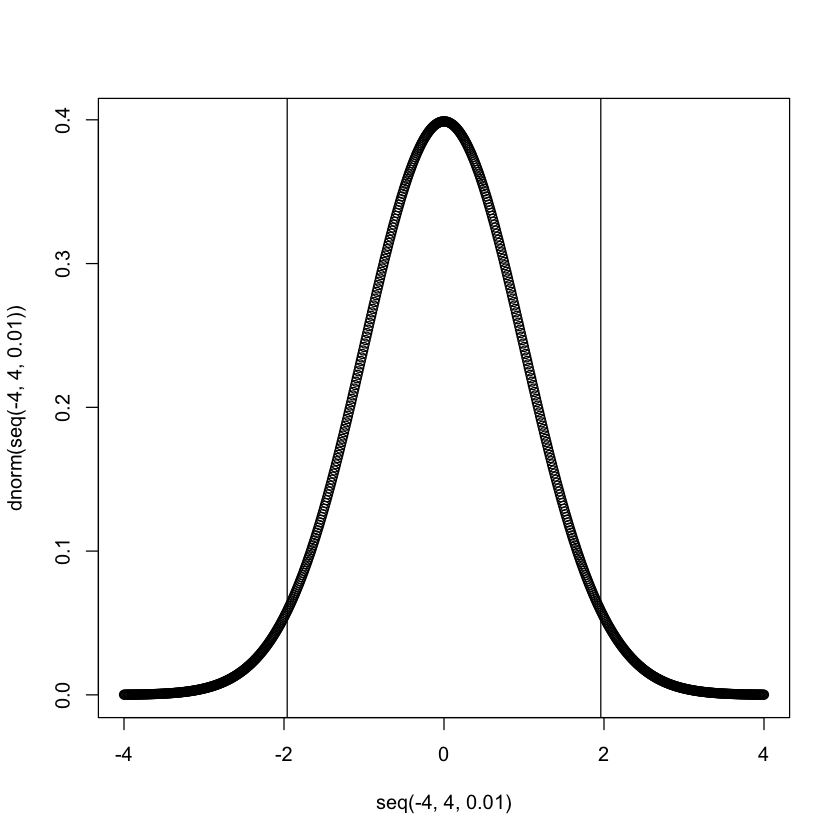

In [68]:
plot(seq(-4, 4, .01), dnorm(seq(-4, 4, .01)))
abline(v=qnorm(.975))
abline(v=qnorm(.025))

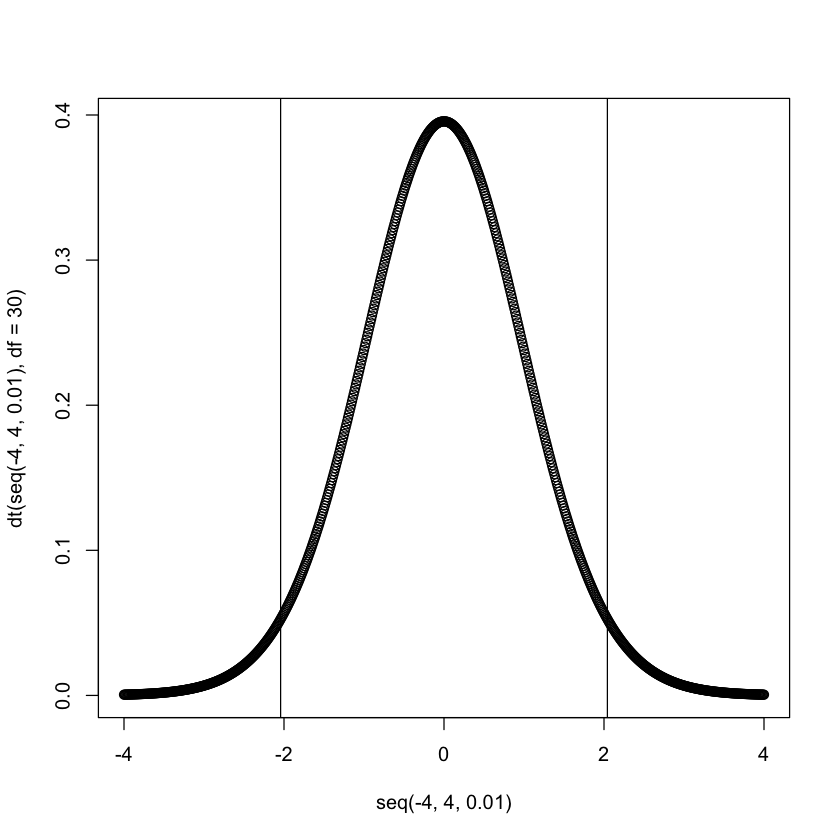

In [69]:
plot(seq(-4, 4, .01), dt(seq(-4, 4, .01), df=30))
abline(v=qt(.975, df=30))
abline(v=qt(.025, df=30))

# 4.8: Run Your Own CI

In [74]:
#VS = 0: v-shaped, VS = 1: straight
t.test(mtcars$mpg[mtcars$vs==0],mtcars$mpg[mtcars$vs==1])


	Welch Two Sample t-test

data:  mtcars$mpg[mtcars$vs == 0] and mtcars$mpg[mtcars$vs == 1]
t = -4.6671, df = 22.716, p-value = 0.0001098
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -11.462508  -4.418445
sample estimates:
mean of x mean of y 
 16.61667  24.55714 


The mean mpg of V-Shaped Engines is ~16.62 while the mean of Straight Engines is ~24.56. We are 95% confident that the true mean of the difference MPG between V-Shaped and Straight Engines lies between -11.5 and -4.42. This means that if we replicate the experiment 100 times, the mean of the experiment will lie between -11.5 and -4.42. This also means that we are 95% confident that the difference in means is not equal to 0.

# 